# Clustering and Neural Networks Application — STARTER NOTEBOOK

**Applied Machine Learning 2 @ Newman University**

*Prof. Ricky Boyer*

**Linh Toan**

Before getting started, you may notice that this notebook adds up to a total of `450 points`, rather than the typical 350. In order to get the full points for this lesson, you only need do enough to yield the `350 points`, however if you do complete the whole notebook, you will receive all the points you earned, giving you a maximum of **`100 bonus points`**. This will be appliead right on top of the notebook, giving the opportunity to mitigate any lost points on other assignments or self-assessments.

As always, best of luck. You've got this.

# Part 1: Regression via Neural Network

You'll remember that we began this journey of Applied Machine Learning 2 by outlining all the different limitations of linear regression. In this assignment, we'll consider the following supervised form of the neural network task. Suppose you have

- a set of observations, $u$, and
- a target variable $y$.

While neural networks can be very complicated, having entire branches of computer science devoted to individualized applications of them, our goal is to give a basic overview through application to a standard regression problem.

> **Note:** Neural networks have broad and far reaching applications. They are capable of solving problems from regression, classification, reinforcement learning, predictive maintenance, generative AI, and so on.

In it's most basic form, all neural networks look like the following with inputs, outputs, weights, biases, activation functions, and neurons.

Each oval in the above graph represents a neuron, and the output of the neuron is calculated as shown below. In simple terms, the output of a neuron is the weighted value of its inputs, with and added bias, passed through what is known as an activation function. The function shown in the picture is known as a logistic or sigmoid function.

The above example uses the simoid function to illustrate that when an input passes through each layer of neurons, the signal is transformed via the activation function. The input signal of the activation function represents the $x$ value of the activation function, where it is solved, creating $f$($x$) in the output signal. There are a wide variety of functions that can be used, but the general idea is that each individual neuron contains a simple function for transformation of the input. We then stack these together in layers, apply weights and biases through backpropagation, and sum the total results. Check out the most commonly used activation functions below:

## Setup: Dataset

As always, let's start by pulling in some data. The following cell will download the data you'll need for this lab. Run it now.

In [1]:
import requests
import os
import hashlib
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def download(file, local_dir="", url_base=None, checksum=None):
    local_file = "{}{}".format(local_dir, file)
    if not os.path.exists(local_file):
        url = "{}{}".format(url_base, file)
        print("Downloading: {} ...".format(url))
        r = requests.get(url)
        with open(local_file, 'wb') as f:
            f.write(r.content)

    if checksum is not None:
        with io.open(local_file, 'rb') as f:
            body = f.read()
            body_checksum = hashlib.md5(body).hexdigest()
            assert body_checksum == checksum, \
                "Downloaded file '{}' has incorrect checksum: '{}' instead of '{}'".format(local_file,
                                                                                           body_checksum,
                                                                                           checksum)
    print("'{}' is ready!".format(file))

URL_BASE = "https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/"
DATA_PATH = ""

datasets = {'logreg_points_train.csv': '9d1e42f49a719da43113678732491c6d',
            'centers_initial_testing.npy': '8884b4af540c1d5119e6e8980da43f04',
            'compute_d2_soln.npy': '980fe348b6cba23cb81ddf703494fb4c',
            'y_test3.npy': 'df322037ea9c523564a5018ea0a70fbf',
            'centers_test3_soln.npy': '0c594b28e512a532a2ef4201535868b5',
            'assign_cluster_labels_S.npy': '37e464f2b79dc1d59f5ec31eaefe4161',
            'assign_cluster_labels_soln.npy': 'fc0e084ac000f30948946d097ed85ebc'}

for filename, checksum in datasets.items():
    download(filename, local_dir=DATA_PATH, url_base=URL_BASE, checksum=checksum)



print("\n(All data appears to be ready.)")

'logreg_points_train.csv' is ready!
'centers_initial_testing.npy' is ready!
'compute_d2_soln.npy' is ready!
'y_test3.npy' is ready!
'centers_test3_soln.npy' is ready!
'assign_cluster_labels_S.npy' is ready!
'assign_cluster_labels_soln.npy' is ready!

(All data appears to be ready.)


In [2]:
import pandas as pd
x = pd.read_csv('./logreg_points_train.csv')
x.head()

,x_1,x_2,label
0,-0.234443,-1.075960,1
1,0.730359,-0.918093,0
2,1.432270,-0.439449,0
3,0.026733,1.050300,0
4,1.879650,0.207743,0


Let's make a quick dataset to demonstrate the power of neural networks.

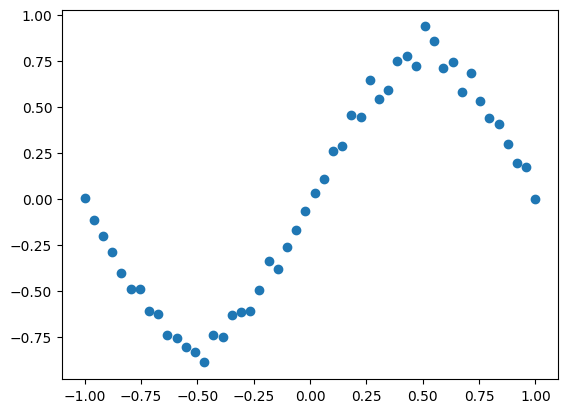

In [3]:
u = np.linspace(-1, 1)
y = np.sin(u*np.pi)*0.8 + np.random.randn(len(u), )*0.05
plt.scatter(u, y)

As you can imagine, a line of best fit created via a linear regression function would pass through with an equation like $y$ = $x$, which make be the best fit that a straight line have, but that doesn't necessarily make it a *good* fit. We can likely do better by allowing for bending in the line. In large part, this is what neural networks excel at when used in a regressive application.

## Initializing our Network


We will build our own network in this example to regress a one dimensional function. This means we will only have one input ($u$), and one output ($y$), but should be a step-by-step guide to building a network. First we need to create our layer of hidden neurons.

**Exercise 0** (`hneurons_test`: 20 points). Create a variable `hneurons`, by assigning an integer between 1 and 10.

In [4]:
hneurons = 3

In [5]:
# Test cell: `hneurons_test`

assert type(hneurons) is int, "Your variable should be an integer instead of a {}".format(type(hneurons))
assert 1 < hneurons < 10, "Your variable should be greater than 1 and less than 10"

print("\n(Passed! Congrats you got 20 points!)")


(Passed! Congrats you got 20 points!)


Next we need to set some initialize some biases. As we have not done backpropagation yet, it doesn't matter what the biases are, we just need somewhere to start!

We'll also need to do the same with the weights.

**Exercise 1** (`hbias_obias_test`: 30 points). Create two bias variables, one for the hidden layer (`h_bias`) and one for the output layer (`o_bias`), using numpy's [`randn()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) function.

> Hint: These can be basically any number, but if you use the function correctly, they'll each be a single float.

In [6]:
h_bias = np.random.random()
o_bias = np.random.random()

In [7]:
# Test cell: `hbias_obias_test`
print(h_bias, o_bias)
assert type(h_bias) is float and type(o_bias) is float, "Your variables should be floats instead of a {}".format(type(h_bias))

print("\n(Passed! Congrats you got 30 points!)")

0.697241636387926 0.7479493318780496

(Passed! Congrats you got 30 points!)


**Exercise 2** (`weights_test`: 30 points). Similarly, create two weight arrays, one for between the input/hidden layer (`w_in_hid`) and one for the output layer (`w_hid_out`), using numpy's [`randn()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) function.

>Hint: Since you need a value for each available connection between layers, this time a correct implementation will yield an array of length `hneurons`.

In [8]:
w_in_hid = np.random.randn(hneurons)
w_hid_out = np.random.randn(hneurons)

In [9]:
# Test cell: `weights_test`
print(w_in_hid, w_hid_out)
test = np.zeros((hneurons,))
assert w_in_hid.shape == test.shape and w_hid_out.shape == test.shape, "Your arrays should have a shape of {}".format(test.shape)

print("\n(Passed! Congrats you got 30 points!)")

[-2.96621899  0.4199733   1.41011106] [ 0.4035917   0.27198107 -1.22271143]

(Passed! Congrats you got 30 points!)


## Activating our Network
Now we need to set up the activation function that will define our hidden layer. Let's experiment with a sigmoid function.

**Exercise 3** (`sigmoid_test`: 30 points). Complete the below function such that it represents the mathematical sigmoid function, taking input `i` and outputting a transformed value.

>Remember that your fully defined formula will need a return function

In [10]:
def sigmoid(i):
    expi = np.exp(-i)
    s = (1 - expi) / (1 + expi)
    return s

In [11]:
# Test cell: `sigmoid_test`
sig_test = [-3, -2, -1, 0, 1, 2, 3]
b = [-0.9051482536448664, -0.7615941559557649, -0.46211715726000974, 0.0, 0.46211715726000974, 0.7615941559557649, 0.9051482536448665]
a=[]
for i in sig_test:
    a.append(sigmoid(i))
assert np.allclose(a, b), "Your output is yielding the sigmoid results"

print("\n(Passed! Congrats you got 30 points!)")


(Passed! Congrats you got 30 points!)


## Putting it Together
We should have almost all the pieces we need! Now let's put everything together, and calculate the sum for y.

Here is what we know happens in each layer:
- Hidden Layer
    - Multiply the weight `w_in_hid` by input `u`
    - Add our bias `h_bias`
    - Apply the activation function to the above
    - Save result as variable
- Output Layer
    - Multiply the weight `w_hid_out` by result of hidden layer
    - Add our bias `o_bias`
    - Apply the activation function to the above
    - Sum all results of the above
    - Output result as y

**Exercise 4** (`n_o_test`: 50 points). Complete the below function, given inputs $u$, `w_in_hid`, `w_hid_out`, `h_bias`, `o_bias` implements all the aforementioned steps in both the hidden layer and the output layer, outputting the final summed answer `y`.

In [12]:
def network_output(u, w_in_hid, w_hid_out, h_bias, o_bias):
    hidden_layer_input = np.dot(w_in_hid, u) + h_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(w_hid_out, hidden_layer_output) + o_bias
    output_layer_output = sigmoid(output_layer_input)


    y = np.sum(output_layer_output)

    return y

In [13]:
# Test cell: `n_o_test`
n_o_test = [0.1, 0.2, 0.3]
a=[]
for u in n_o_test:
    print(network_output(u, w_in_hid, w_hid_out, h_bias, o_bias))
    assert .05 <= network_output(u, w_in_hid, w_hid_out, h_bias, o_bias) <= .95
    a.append(network_output(u, w_in_hid, w_hid_out, h_bias, o_bias))

print(a)
print("\n(Passed! Congrats you got 50 points!)")

0.21627304600269007
0.15623303237729635
0.0966940319287539
[0.21627304600269007, 0.15623303237729635, 0.0966940319287539]

(Passed! Congrats you got 50 points!)


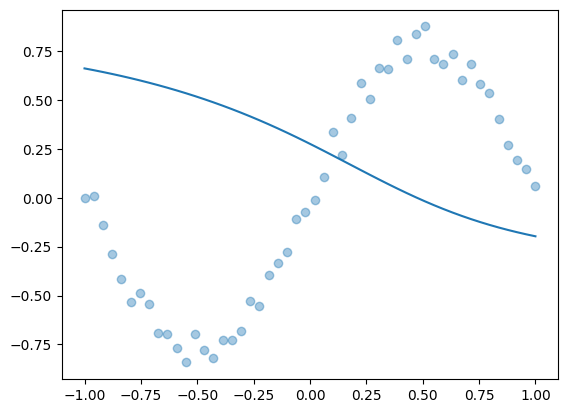

In [14]:
##Importing some more and creating helper functions for later
import scipy.optimize
import sklearn
import sklearn.neural_network
u = np.linspace(-1, 1)
y = np.sin(u*np.pi)*0.8 + np.random.randn(len(u), )*0.05

def pack(w_in_hid, w_hid_out, h_bias, o_bias):
    return np.concatenate([w_in_hid,
                              w_hid_out,
                              np.array([h_bias]),
                              np.array([o_bias])])

def unpack(parameters):
    parts = np.split(parameters, [hneurons, 2*hneurons, 2*hneurons + 1])
    return parts

p0 = pack(w_in_hid, w_hid_out, h_bias, o_bias)

def predict(parameters, us):
    w_in_hid, w_hid_out, h_bias, o_bias = unpack(parameters)
    return np.array([network_output(u, w_in_hid, w_hid_out, h_bias, o_bias) for u in us])

def plotfit(predictions):
    plt.scatter(u, y, alpha=0.4)
    plt.plot(u, predictions)

def errorfunction(parameters):
    return y - predict(parameters, u)

plotfit(predict(p0, u))

## Backing it Up

As stated earlier, and you saw through your implementation, we have chosen random weights and biases that are not optimized. As you can see, our current line is not much better than we could expect from a simple linear regression. However, we have much more to work with by adding the hidden layer!

Using gradient descent, we can backpropagate the weights and biases with a function that minimizes the least squares, much like we did when creating our regression algorithm.

**Exercise 5** (`neural_test`: 30 points). Based on our objective of reducing the error function `errorfunction`, use the function [scipy.optimize.least_squares()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) using the `errorfunction` and our packed `p0` to create the `result` variable.

In [15]:
result = scipy.optimize.least_squares(errorfunction, p0)

Sum of Squared Error:  0.2068575203984552

(Passed! Congrats you got 30 points!)


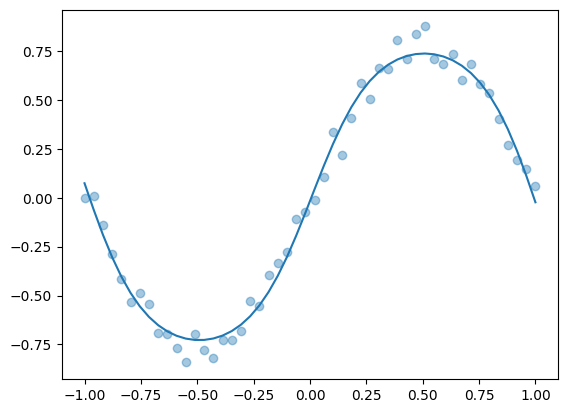

In [16]:
# Test cell: `neural_test`
squared_error = (predict(result.x, u) - y)**2
print("Sum of Squared Error: ", squared_error.sum())
assert squared_error.sum() < .3
print("\n(Passed! Congrats you got 30 points!)")
plotfit(predict(result.x, u))

## Un-reinvernting the Wheel

As you may be aware, there is already a function within scikit that runs a full neural network for regression problems. Check it out here: [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html). We should try it out and see how it compares to our homebrewed algorithm!

**Exercise 6** (`MLP_test`: 30 points). Use the `scikit.MLPRegressor` function to create the variable `MLP`. Set the maximum iterations to 1000, as to not take too long to run.

> Note:  The sigmoid activation function is not an available option, but we'll want to use one that looks similar. Try the `tanh` function.

> You may also need to experiment with which `solver` function works best for our purposes. There are only 3 options, so try them out and see which one you think fits best.

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
MLP = MLPRegressor(activation='tanh', solver='lbfgs', max_iter=1000)


observations = np.atleast_2d(u).T
MLP.fit(observations, y)

MLPRegressor(activation='tanh', max_iter=1000, solver='lbfgs')

Sum of Squared Error:  0.14190905665422415

(Passed! Congrats you got 30 points!)


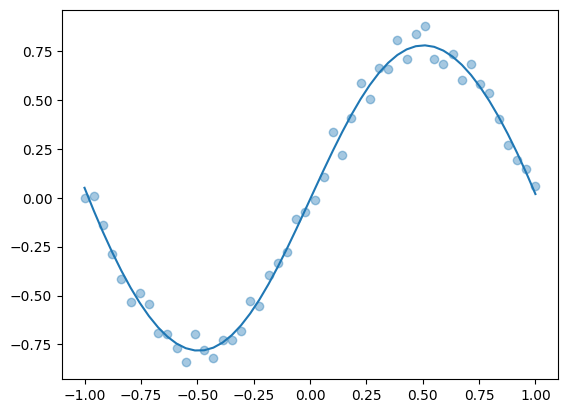

In [19]:
# Test cell: `MLP_test`
# Tests that it uses sckit function and has 3 layers
assert MLP.n_layers_ == 3, "Your network should have 3 layers  instead of {}".format(MLP.n_layers_)

# Tests that has decent enough configuration
sum_squared_error = (MLP.predict(observations)-y)**2
print("Sum of Squared Error: ", sum_squared_error.sum())
assert sum_squared_error.sum() < .20, "Scikit's MLPRegressor should be getting a little closer than that. Sum or sqaured error should be less than .2"
print("\n(Passed! Congrats you got 30 points!)")
plotfit(MLP.predict(observations))

Seems like ours was not quite as good as the Scikit function but not too bad for something that we cooked up in just a few weeks.

**Impressive!** If you have made it this far, then you should be ready to move on to the next section!

# Part 2: Clustering via $k$-means

In our previous course, we studied the classification problem using the logistic regression, XGBoost, and various other algorithms. Since we had labels for each data point, we regard the problem as one of _supervised learning_. However, in many applications, the data have no labels but we wish to discover possible labels (or other hidden patterns or structures). This problem is one of _unsupervised learning_. How can we approach such problems?

**Clustering** is one class of unsupervised learning methods. In this assignment, we'll consider the following form of the clustering task. Suppose you are given

- a set of observations, $X \equiv \{\hat{x}_i \,|\, 0 \leq i < n\}$, and
- a target number of _clusters_, $k$.

Your goal is to partition the points into $k$ subsets, $C_0,\dots, C_{k-1} \subseteq X$, which are

- disjoint, i.e., $i \neq j \implies C_i \cap C_j = \emptyset$;
- but also complete, i.e., $C_0 \cup C_1 \cup \cdots \cup C_{k-1} = X$.

Intuitively, each cluster should reflect some "sensible" grouping. Thus, we need to specify what constitutes such a grouping.

## The $k$-means clustering criterion

Here is one way to measure the quality of a set of clusters. For each cluster $C$, consider its center $\mu$ and measure the distance $\|x-\mu\|$ of each observation $x \in C$ to the center. Add these up for all points in the cluster; call this sum is the _within-cluster sum-of-squares (WCSS)_. Then, set as our goal to choose clusters that minimize the total WCSS over _all_ clusters.

More formally, given a clustering $C = \{C_0, C_1, \ldots, C_{k-1}\}$, let

$$
  \mathrm{WCSS}(C) \equiv \sum_{i=0}^{k-1} \sum_{x\in C_i} \|x - \mu_i\|^2,
$$

where $\mu_i$ is the center of $C_i$. This center may be computed simply as the mean of all points in $C_i$, i.e.,

$$
  \mu_i \equiv \dfrac{1}{|C_i|} \sum_{x \in C_i} x.
$$

Then, our objective is to find the "best" clustering, $C_*$, which is the one that has a minimum WCSS.

$$
  C_* = \arg\min_C \mathrm{WCSS}(C).
$$

## The standard $k$-means algorithm (Lloyd's algorithm)

Finding the global optimum is [NP-hard](https://en.wikipedia.org/wiki/NP-hardness), which is computer science mumbo jumbo for "we don't know whether there is an algorithm to calculate the exact answer in fewer steps than exponential in the size of the input." Nevertheless, there is an iterative method, Lloyd’s algorithm, that can quickly converge to a _local_ (as opposed to _global_) minimum. The procedure alternates between two operations: _assignment_ and _update_.

**Step 1: Assignment.** Given a fixed set of $k$ centers, assign each point to the nearest center:

$$
  C_i = \{\hat{x}: \| \hat{x} - \mu_i \| \le \| \hat{x} - \mu_j \|, 1 \le j \le k \}.
$$

**Step 2: Update.** Recompute the $k$ centers ("centroids") by averaging all the data points belonging to each cluster, i.e., taking their mean:

$$
  \mu_i = \dfrac{1}{|C_i|} \sum_{\hat{x} \in C_i} \hat{x}
$$

> Figure from: http://stanford.edu/~cpiech/cs221/img/kmeansViz.png

In the code that follows, it will be convenient to use our usual "data matrix" convention, that is, each row of a data matrix $X$ is one of $m$ observations and each column (coordinate) is one of $d$ predictors. However, we will _not_ need a dummy column of ones since we are not fitting a function.

$$
  X
  \equiv \left(\begin{array}{c} \hat{x}_0^T \\ \vdots \\ \hat{x}_{m}^T \end{array}\right)
  = \left(\begin{array}{ccc} x_0 & \cdots & x_{d-1} \end{array}\right).
$$

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib as mpl
mpl.rc("savefig", dpi=100) # Adjust for higher-resolution figures

We will use the following data set for this portion of the assignment.

In [21]:
df = pd.read_csv('{}logreg_points_train.csv'.format(DATA_PATH))
df.head()

,x_1,x_2,label
0,-0.234443,-1.075960,1
1,0.730359,-0.918093,0
2,1.432270,-0.439449,0
3,0.026733,1.050300,0
4,1.879650,0.207743,0


In [22]:
# Some helper functions as we go along
def make_scatter_plot(df, x="x_1", y="x_2", hue="label",
                      palette={0: "red", 1: "blue"},
                      size=5,
                      centers=None):
    sns.lmplot(x=x, y=y, hue=hue, data=df, palette=palette,
               fit_reg=False)
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1],
                    marker=u'x', s=200,
                    c=[palette[0], palette[1]])

def mark_matches(a, b, exact=False):
    """
    Given two Numpy arrays of {0, 1} labels, returns a new boolean
    array indicating at which locations the input arrays have the
    same label (i.e., the corresponding entry is True).

    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as the same up to a swapping of the labels. This feature
    allows

      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]

    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1)).all()
    assert ((b_int == 0) | (b_int == 1)).all()

    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False # Invert

def count_matches(a, b, exact=False):
    """
    Given two sets of {0, 1} labels, returns the number of mismatches.

    This function can consider "inexact" matches. That is, if `exact`
    is False, then the function will assume the {0, 1} labels may be
    regarded as similar up to a swapping of the labels. This feature
    allows

      a == [0, 0, 1, 1, 0, 1, 1]
      b == [1, 1, 0, 0, 1, 0, 0]

    to be regarded as equal. (That is, use `exact=False` when you
    only care about "relative" labeling.)
    """
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

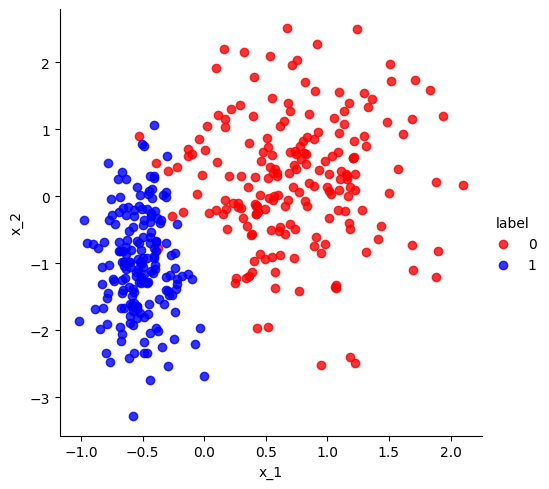

In [23]:
make_scatter_plot(df)

Let's extract the data points as a data matrix, `points`, and the labels as a vector, `labels`. Note that the k-means algorithm you will implement should **not** reference `labels` -- that's the solution we will try to predict given only the point coordinates (`points`) and target number of clusters (`k`).

In [24]:
points = df[['x_1', 'x_2']].to_numpy()
labels = df['label'].to_numpy()
n, d = points.shape
k = 2

Note that the labels should _not_ be used in the $k$-means algorithm. We use them here only as ground truth for later verification.

### How to start? Initializing the $k$ centers

To start the algorithm, you need an initial guess. Let's randomly choose $k$ observations from the data.

**Exercise 7** (`init_centers_test`: 25 points). Complete the following function, `init_centers(X, k)`, so that it randomly selects $k$ of the given observations to serve as centers. It should return a Numpy array of size `k`-by-`d`, where `d` is the number of columns of `X`.

In [25]:
def init_centers(X, k):
    """
    Randomly samples k observations from X as centers.
    Returns these centers as a (k x d) numpy array.
    """
    from numpy.random import choice
    idx = np.random.choice(X.shape[0], k, replace=False)
    centroid = X[idx]
    return centroid

In [26]:
# Test cell: `init_centers_test`

centers_initial = init_centers(points, k)
print("Initial centers:\n", centers_initial)

assert type(centers_initial) is np.ndarray, "Your function should return a Numpy array instead of a {}".format(type(centers_initial))
assert centers_initial.shape == (k, d), "Returned centers do not have the right shape ({} x {})".format(k, d)
assert (sum(centers_initial[0, :] == points) == [1, 1]).all(), "The centers must come from the input."
assert (sum(centers_initial[1, :] == points) == [1, 1]).all(), "The centers must come from the input."

print("\n(Passed! Congrats you got 25 points!)")

Initial centers:
 [[1.23937  2.49089 ]
 [1.03926  0.599654]]

(Passed! Congrats you got 25 points!)


### Computing the distances

**Exercise 8** (`compute_d2_test`: 30 points). Implement a function that computes a distance matrix, $S = (s_{ij})$ such that $s_{ij} = d_{ij}^2$ is the _squared_ distance from point $\hat{x}_i$ to center $\mu_j$. It should return a Numpy matrix `S[:m, :k]`.

>Try a `for` loop

In [27]:
def compute_d2(X, centers):
    m = len(X)
    k = len(centers)

    S = np.empty((m, k))

    for i in range(m):
      for j in range(k):
        S[i,j] = np.sum((X[i] - centers[j]) ** 2)

    return S

In [28]:
# Test cell: `compute_d2_test`

centers_initial_testing = np.load("{}centers_initial_testing.npy".format(DATA_PATH))
compute_d2_soln = np.load("{}compute_d2_soln.npy".format(DATA_PATH))

S = compute_d2 (points, centers_initial_testing)
assert (np.linalg.norm (S - compute_d2_soln, axis=1) <= (50.0 * np.finfo(float).eps)).all ()

print("\n(Passed! Congrats you got 30 points!)")


(Passed! Congrats you got 30 points!)


**Exercise 9** (`assign_cluster_labels_test`: 25 points). Write a function that uses the (squared) distance matrix to assign a "cluster label" to each point.

That is, consider the $m \times k$ squared distance matrix $S$. For each point $i$, if $s_{i,j}$ is the minimum squared distance for point $i$, then the index $j$ is $i$'s cluster label. In other words, your function should return a (column) vector $y$ of length $m$ such that

$$
  y_i = \underset{j \in \{0, \ldots, k-1\}}{\operatorname{argmin}} s_{ij}.
$$

> Hint: Judicious use of Numpy's [`argmin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) makes for a nice one-line solution.

In [29]:
def assign_cluster_labels(S):
    y = np.argmin(S, axis=1)
    return y


# Cluster labels:     0    1
S_test1 = np.array([[0.3, 0.2],  # --> cluster 1
                    [0.1, 0.5],  # --> cluster 0
                    [0.4, 0.2]]) # --> cluster 1
y_test1 = assign_cluster_labels(S_test1)
print("You found:", y_test1)

assert (y_test1 == np.array([1, 0, 1])).all()

You found: [1 0 1]


In [30]:
# Test cell: `assign_cluster_labels_test`

S_test2 = np.load("{}assign_cluster_labels_S.npy".format(DATA_PATH))
y_test2_soln = np.load("{}assign_cluster_labels_soln.npy".format(DATA_PATH))
y_test2 = assign_cluster_labels(S_test2)
assert (y_test2 == y_test2_soln).all()

print("\n(Passed! Congrats you got 25 points!)")


(Passed! Congrats you got 25 points!)


**Exercise 10** (`update_centers_test`: 30 points). Given a clustering (i.e., a set of points and assignment of labels), compute the center of each cluster.

In [31]:
def update_centers(X, y):
    # X[:m, :d] == m points, each of dimension d
    # y[:m] == cluster labels
    m, d = X.shape
    k = max(y) + 1
    assert m == len(y)
    assert (min(y) >= 0)

    centers = np.empty((k, d))
    for j in range(k):
        # Compute the new center of cluster j,
        # i.e., centers[j, :d].
        ##YOUR ANSWER HERE##
        centers[j,:] = X[j == y].mean(axis=0)
    return centers

In [32]:
# Test cell: `update_centers_test`

y_test3 = np.load("{}y_test3.npy".format(DATA_PATH))
centers_test3_soln = np.load("{}centers_test3_soln.npy".format(DATA_PATH))
centers_test3 = update_centers(points, y_test3)

delta_test3 = np.abs(centers_test3 - centers_test3_soln)
assert (delta_test3 <= 2.0*len(centers_test3_soln)*np.finfo(float).eps).all()

print("\n(Passed! Congrats you got 30 points!)")


(Passed! Congrats you got 30 points!)


**Exercise 11** (`WCSS`: 30 points). Given the squared distances, return the within-cluster sum of squares.

In particular, your function should have the signature,

```python
    def WCSS(S):
        ...
```

where `S` is an array of distances as might be computed from Exercise 2.

For example, suppose `S` is defined as follows:

```python
    S = np.array([[0.3, 0.2],
                  [0.1, 0.5],
                  [0.4, 0.2]])
```

Then `WCSS(S) == 0.2 + 0.1 + 0.2 == 0.5.`

> _Hint_: See [numpy.amin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amin.html#numpy.amin).

In [33]:
def WCSS(S):
    ##YOUR ANSWER HERE##
    return np.sum(np.amin(S, axis=1))

# Quick test:
print("S ==\n", S_test1)
WCSS_test1 = WCSS(S_test1)
print("\nWCSS(S) ==", WCSS(S_test1))

S ==
 [[0.3 0.2]
 [0.1 0.5]
 [0.4 0.2]]

WCSS(S) == 0.5


In [34]:
# Test cell: `WCSS_test`

assert np.abs(WCSS_test1 - 0.5) <= 3.0*np.finfo(float).eps, "WCSS(S_test1) should be close to 0.5, not {}".format(WCSS_test1)
print("\n(Passed! Congrats you got 30 points!)")


(Passed! Congrats you got 30 points!)


Lastly, here is a function to check whether the centers have "moved," given two instances of the center values. It accounts for the fact that the order of centers may have changed.

In [35]:
def has_converged(old_centers, centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])

**Exercise 12** (`kmeans_test`: 40 points). Put all of the preceding building blocks together to implement Lloyd's $k$-means algorithm.

In [36]:
def kmeans(X, k,
           starting_centers=None,
           max_steps=np.inf):
    if starting_centers is None:
        centers = init_centers(X, k)
    else:
        centers = starting_centers

    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_centers = centers

        ##YOUR ANSWER HERE##
        S = compute_d2(X, old_centers)
        labels = assign_cluster_labels(S)
        centers = update_centers(X, labels)
        converged = has_converged(old_centers, centers)
        print ("iteration", i, "WCSS = ", WCSS (S))
        i += 1
    return labels

clustering = kmeans(points, k, starting_centers=points[[0, 187], :])

iteration 1 WCSS =  549.9175535488309
iteration 2 WCSS =  339.800663302551
iteration 3 WCSS =  300.330112922328
iteration 4 WCSS =  289.80700777322045
iteration 5 WCSS =  286.0745591062787
iteration 6 WCSS =  284.1907705579879
iteration 7 WCSS =  283.22732249939105
iteration 8 WCSS =  282.456491302569
iteration 9 WCSS =  281.84838225337074
iteration 10 WCSS =  281.57242082723724
iteration 11 WCSS =  281.5315627987326


Let's visualize the results.

329 matches out of 375 possible (~ 87.7%)

(Passed! Congrats you got 40 points!)


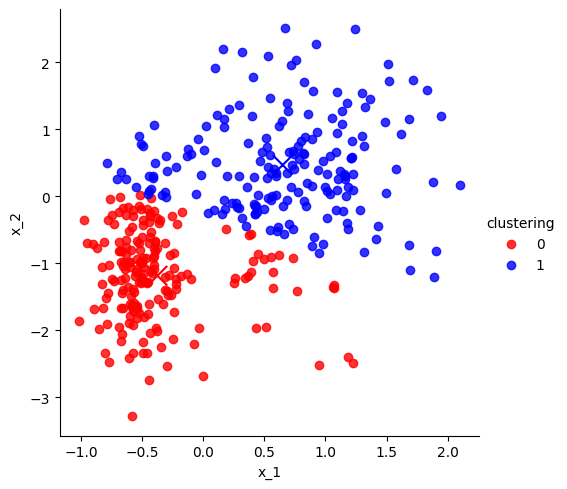

In [37]:
# Test cell: `kmeans_test`

df['clustering'] = clustering
centers = update_centers(points, clustering)
make_scatter_plot(df, hue='clustering', centers=centers)

n_matches = count_matches(df['label'], df['clustering'])
print(n_matches,
      "matches out of",
      len(df), "possible",
      "(~ {:.1f}%)".format(100.0 * n_matches / len(df)))

assert n_matches >= 320, "Seems like your clusters don't match as much as expected. At least 85% should match."
print("\n(Passed! Congrats you got 40 points!)")

## Built-in $k$-means

The preceding exercises walked you through how to implement $k$-means, but as you might have imagined, there are existing implementations as well! The following shows you how to use Scipy's implementation, which should yield similar results. If you are asked to use $k$-means in a future lab (or exam!), you can use this one.

In [38]:
from scipy.cluster import vq

Centers:
 [[-0.3742504  -1.17922941]
 [ 0.65580448  0.4690796 ]]

Compare with your method:
 [[-0.37382602 -1.18565619]
 [ 0.64980076  0.4667703 ]] 

Distortion (WCSS): 0.7503762713193447
329 matches out of 375 possible (~ 87.7%)


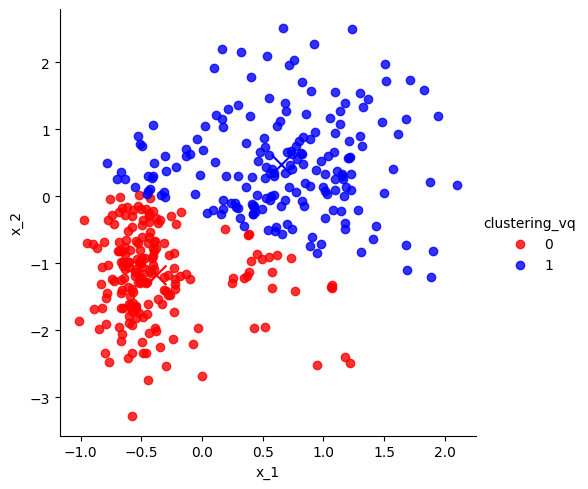

In [39]:
# `distortion` below is the similar to WCSS.
# It is called distortion in the Scipy documentation
# since clustering can be used in compression.
centers_vq, distortion_vq = vq.kmeans(points, k)

# vq return the clustering (assignment of group for each point)
# based on the centers obtained by the kmeans function.
# _ here means ignore the second return value
clustering_vq, _ = vq.vq(points, centers_vq)

print("Centers:\n", centers_vq)
print("\nCompare with your method:\n", centers, "\n")
print("Distortion (WCSS):", distortion_vq)

df['clustering_vq'] = clustering_vq
make_scatter_plot(df, hue='clustering_vq', centers=centers_vq)

n_matches_vq = count_matches(df['label'], df['clustering_vq'])
print(n_matches_vq,
      "matches out of",
      len(df), "possible",
      "(~ {:.1f}%)".format(100.0 * n_matches_vq / len(df)))

**How exciting!** If you have made it this far, then you should be ready to move on to the next section!

# Part 3: Spectral Clustering

If you do not wish to complete this part of the notebook, then you are not required to do so. However, if you feel that you'd like additional knowledge, or bonus points to put you ahead, then this is the spot for you!

> This portion of the notebook is adapted from https://www.kaggle.com/code/oscarm524/intro-to-spectral-clustering-a-toy-example. If you have questions or concerns, it should prove a great resource.

As noted earlier, **Clustering** is one class of unsupervised learning methods. $k$-means is great if you are looking at data that is more sporadically placed around a scatterplot in our 2 dimesnsional space. Let's explore a potential shortcoming of the k-means function.

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

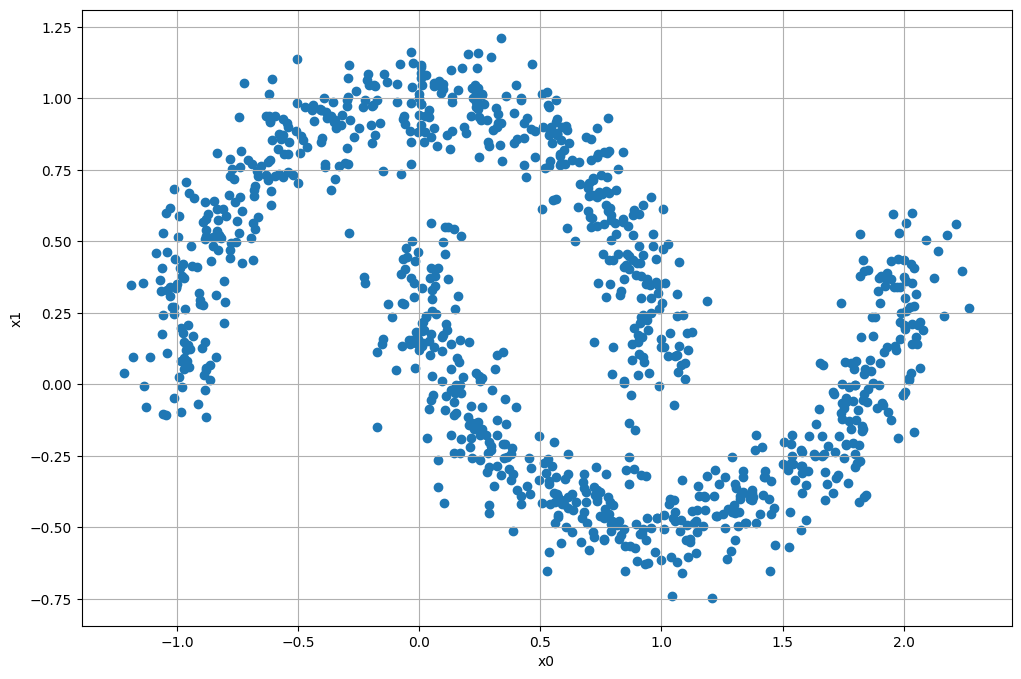

In [41]:
nb_samples = 1000
#X = np.zeros(shape = (nb_samples, 2))
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

moons = pd.DataFrame(X)

fig = plt.figure(figsize = (12,8))

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.show();

Let's try the scikit $k$-means function to see what clusters would be created via traditional means.

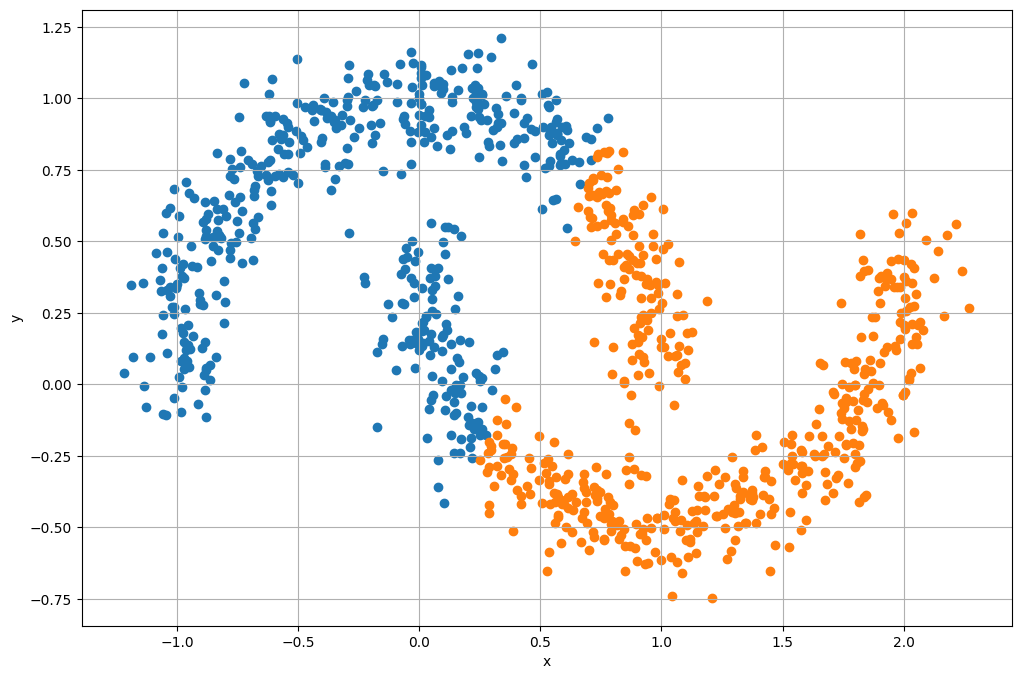

In [42]:
## Fitting k-means with 2 clusters
kmeans_md = KMeans(n_clusters = 2, init = 'k-means++', n_init = 20).fit(X)
## Appending cluster to the sine dataset
moons.columns = ['x', 'y']
moons['kmeans_cluster'] = kmeans_md.labels_

## Visualizing the data with cluster

fig = plt.figure(figsize = (12,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

for c in moons['kmeans_cluster'].unique():

        temp = moons[moons['kmeans_cluster'] == c]
        plt.scatter(temp['x'], temp['y'])

moons = moons.drop(columns=['kmeans_cluster'])

In most cases, we would want to be grouping the top set of points together and the bottom set together. Based on what you know about the $k$-means function, it's limitation to this specific case is that it seeks to minimize the summed distance between the centers and each point, however for data with irregular shapes, our goal is not always to minimize euclidean distance.

Most of the below is some pretty complicated math jargon from the original Berkley-created method of clustering. You will not be expected to know the math behind the eigenvalue and eiganvecotrs, but see how much of the below you are able to follow. For our purposes, focus on the **$k$-nearest neighbor** portion.

We can build a graph $G = \{V, E\}$, where the vertices are the points and the edges are determined using an affinity matrix $W$. Each element $w_{ij}$ must express the affinity between the points $x_i$ and $x_j$. $W$ is normally built using two different approaches:


1. **$k$-nearest neighbors:** In this case, we can build the number of neighbors to take into account for each point $x_i$. $W$ can be built as a connectivity matrix (expressing only the existence of a connection between two samples) if we adopt the criterion:

$$ w_{ij} = \left\{ \begin{array}{ll} 1 & \text{ if $x_j \: \in \: neighborhood_k(x_i)$} \\ 0 & \text{ otherwise} \end{array} \right.$$

  Alternatively, it's possible to build a distance matrix as follows:

$$ w_{ij} = \left\{ \begin{array}{ll} d(x_i, x_j) & \text{ if $x_j \: \in \: neighborhood_k(x_i)$} \\ 0 & \text{ otherwise} \end{array} \right.$$


2. **Radial basis function (RBF):** The previous method can lead to graphs that are not fully connected because samples can exist that have no neighbors. In order to obtain a fully connected graph, it's possible to employ an RBF approach as follows:

$$ w_{ij} = e^{-\gamma ||x_i - x_j||^2}$$

  The parameter $\gamma$ allows you to control the amplitude of the Gaussian function, reducing or increasing the number of samples with a large weight (actual neighbors). However, a weight is assigned to all points and the resulting graph will always be connected (even if many elements are close to zero).


In both cases, the elements of $W$ will represent a measure of affinity (or closeness) between points and no restrictions are imposed on the global geometry (contrary to $k$-means). In particular, using $k$-NN connectivity matrix, we are implicitly segmenting the original dataset into smaller regions with a high level of internal cohesion. The problem that we need to solve now is to find out a way to merge all regions belonging to the same cluster.

The approach we are going to present in this section has been proposed by [Shi and Malik (2000)](https://people.eecs.berkeley.edu/~malik/papers/SM-ncut.pdf), and it is based on the normalized graph Laplacian:

\begin{equation}
L_n = I - D^{-1}W
\end{equation}

The matrix $D$ is called the degree matrix as is given by:

\begin{equation}
D = diag\left( \underset{j}{\sum} w_{ij} \: \text{ for all } i \in (1, M) \right)
\end{equation}

It is possible to prove the following:

1. The eigenvalues $\lambda_i$ and the eigenvectors $v_i$ of $L_n$ can be found by solving the problem $Lv = \lambda Dv$, where L is the unnormalized graph Laplacian $L = D - W$.

2. $L_n$ always has an eigenvalue equal to 0 (with a multiplicity $k$) with a corresponding eigenvector $v_0 = (1, 1, \ldots, 1)$

3. As G is undirected and all $w_{ij} \geq 0$, the number of connected components $k$ of $G$ is equal to the multiplicity of the null eigenvalue.

In other words, the normalized graph Laplacian encodes the information about the number of connected components and provides us with a new reference system where the clusters can be separated using regular geometric shapes (normally hyper-spheres).

Since $L_n \in \mathbb{R}^{M \times M}$, its eigenvectors $v_i \in \mathbb{R}^M$. Selecting the first $k$ eigenvectors it is possible to build a matrix $A \in \mathbb{R}^{M \times k}$:

\begin{equation}
A = \left(\begin{array}{cccc} v_1^{(1)} & v_2^{(1)} & \cdots & v_k^{(1)} \\ \vdots & \vdots & \ddots & \vdots \\ v_1^{(M)} & v_2^{(M)} & \cdots & v_k^{(M)} \end{array} \right)
\end{equation}

Each row of $A$, $(a_j \in \mathbb{R}^k)$, can be considered as the projection of an original point $x_j$ in the low dimensional subspace spanned by the eigenvectors associated with the null eigenvalues of $L_n$. At this point, the separability of the new dataset $A = \{a_j\}$ depends only on the structure of the graph $G$ and, in particular, on the number of neighbors or the $\gamma$ parameter for RBF. As in many other similar cases, it's impossible to define a standard value suitable for all problems. A reasonable approach should start with a small number of neighbors (for example, 5 or 10) or $\gamma = 1$ and increase the values until a performance metric (such as the adjusted rank index) reaches its maximum.

## The complete Shi-Malik spectral clustering algorithm is:

1. Select a graph construction method between $k$-NN and RBF:
    
    * Select the parameter $k$ or

    * Select the parameter $\gamma$

2. Select the expected number of clusters $N_k$.

3. Compute the matrices $W$ and $D$

4. Compute the normalized graph Laplacian $L_n$

5. Compute the first $k$ eigenvectors of $L_n$

6. Build the matrix $A$

    * Cluster the rows of $A$ using $k$-means or $k$-means++

The result of running $k$-means (with 2 clusters) is the sinusoidal dataset is shown in below. As expected, $k$-means is not able to separate the two sinusoids. You are free to try running $k$-means with other number of clusters, but the result will always be unacceptable because $k$-means bi-dimensional clusters are circles (when working in $\mathbb{R}^n$ they become hyper-spheres, but the structural relations remain the same) and no valid configurations exist. We can now employ spectral clustering using an affinity matrix based on $k$-NN algorithm (in this case, scikit-learn produce a warning because the graph is not fully connected, but normally this doesn't affect the results).

**Exercise 13** (`spectral_test`: 50 points). Complete the spectral clustering algorithm such that given inputs of matrix $X$ and desired clusters $k$, it will appropriately cluster and label the $X$ matrix.

In [89]:
from scipy.linalg import eigh

In [97]:
def spec_clust(X, k):
    ##YOUR ANSWER HERE
    epsilon = np.finfo(np.float64).eps
    n = X.shape[0]
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distance_matrix[i, j] = np.linalg.norm(X[i] - X[j])

    W = (distance_matrix <= epsilon).astype(float)        
    np.fill_diagonal(W,0)

#     pairwise_dists = squareform(pdist(X, 'euclidean'))
#     W = (pairwise_dists <= epsilon).astype(float)
#     np.fill_diagonal(W, 0)
    
    D = np.diag(np.sum(W, axis=1))
    
    # Compute the normalized graph Laplacian L
    L = D - W
    
    # Compute the first k eigenvectors of L
    eigvals, eigvects = eigh(L)
    
    # Build the A matrix
    A = eigvects[:,:k]
    
    # Cluster the rows of A using k-means or k-means++
    kmeans_md = KMeans(n_clusters=k, init='k-means++', n_init=20).fit(A)
    
    labels = kmeans_md.labels_
    
    return labels

In [98]:
# Test cell: `spectral_test`
spec_clust(moons, 2)
plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in moons['spectral_clusters'].unique():
        temp = moons[moons['spectral_clusters'] == c]
        plt.scatter(temp['x'], temp['y'])

KeyError: 0

**Mathematical!** If you have made it this far with no errors, then you are ready to submit your notebook!